# Periodic 1D nearest neighbor chain

Notice how nearest neighbor periodic 1D chain is interpreted as *next* to nearest neighbor 1D chain with open boundaries.\
Cool and unknown result

In [31]:
import pulser
import numpy as np
import example.helpers as helpers
import optimatrix

In [32]:
def one_dim_systems_coords(L: int) -> np.ndarray:
    coords = (
        np.array(
            [
                (np.cos(theta * 2 * np.pi / L), np.sin(theta * 2 * np.pi / L))
                for theta in range(L)
            ]
        )
    )

    reg = pulser.Register.from_coordinates(coords, prefix=None)
    return reg


original_chain = one_dim_systems_coords(10)
chain = helpers.shuffle_qubits(original_chain)


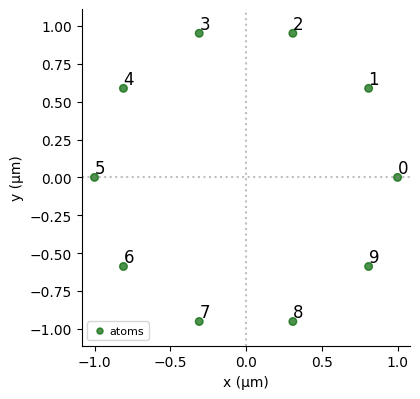

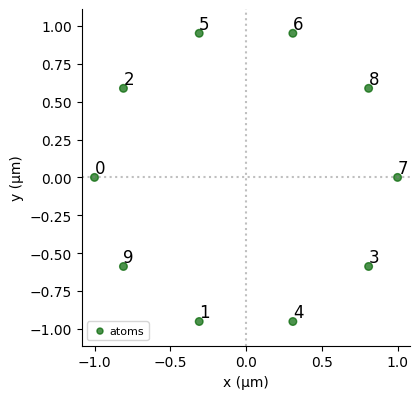

In [33]:

original_chain.draw()
chain.draw()


[[0.         0.7236068  2.61803399 0.2763932  0.38196601 0.7236068
  0.38196601 0.25       0.2763932  2.61803399]
 [0.7236068  0.         0.38196601 0.7236068  2.61803399 0.2763932
  0.25       0.38196601 0.2763932  2.61803399]
 [2.61803399 0.38196601 0.         0.25       0.2763932  2.61803399
  0.7236068  0.2763932  0.38196601 0.7236068 ]
 [0.2763932  0.7236068  0.25       0.         2.61803399 0.2763932
  0.38196601 2.61803399 0.7236068  0.38196601]
 [0.38196601 2.61803399 0.2763932  2.61803399 0.         0.25
  0.2763932  0.7236068  0.38196601 0.7236068 ]
 [0.7236068  0.2763932  2.61803399 0.2763932  0.25       0.
  2.61803399 0.38196601 0.7236068  0.38196601]
 [0.38196601 0.25       0.7236068  0.38196601 0.2763932  2.61803399
  0.         0.7236068  2.61803399 0.2763932 ]
 [0.25       0.38196601 0.2763932  2.61803399 0.7236068  0.38196601
  0.7236068  0.         2.61803399 0.2763932 ]
 [0.2763932  0.2763932  0.38196601 0.7236068  0.38196601 0.7236068
  2.61803399 2.61803399 0.    

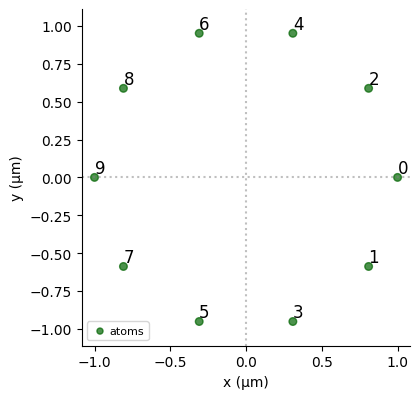

In [34]:
interactions = helpers.reciprocal_dist_matrix(chain)
print(interactions)
optimal_permutation = optimatrix.minimize_bandwidth(interactions)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)

chain.draw()

In [35]:
m = 5
elements = [1] * m
interactions = np.diag(elements, k=1) + np.diag(elements, k=-1)
interactions[m,0] = 1
interactions[0,m] = 1
print(interactions)

optimal_permutation = optimatrix.minimize_bandwidth(interactions)

print(optimatrix.permute_matrix(interactions, optimal_permutation))


[[0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]
[[0 1 1 0 0 0]
 [1 0 0 1 0 0]
 [1 0 0 0 1 0]
 [0 1 0 0 0 1]
 [0 0 1 0 0 1]
 [0 0 0 1 1 0]]
